In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import platform
import matplotlib.pyplot as plt

In [9]:
Titanic_df = pd.read_csv('/content/drive/MyDrive/11. 데이터분석/data/titanic_decked_data.csv')
Titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,0,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,1,C,1
2,3,1,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,0,C,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,0,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.000000,0,0,112053,30.0000,B42,0,B,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,29.699118,1,2,W./C. 6607,23.4500,NaN,0,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,1,C,1


In [10]:
# 피처와 타겟 분리
# 타겟 변수 'Survived'
y = Titanic_df['Survived']

# 피처: 'Survived'를 제외한 모든 컬럼
X = Titanic_df.drop(columns=['Survived'])

In [11]:
# 학습용 / 테스트용 데이터 분할
from sklearn.model_selection import train_test_split

# X = 피쳐 (타겟을 제외한 나머지들)
# y = 타겟 '생존' 유무를 저장

# 근데 그 전에 필요할것 같아서 남겨둔 데이터중 ['Name', 'Ticket', 'Cabin'] drop 필요. 단 원본 데이터는 그래도 유지

deck_map = {deck: idx for idx, deck in enumerate(sorted(Titanic_df['Deck'].dropna().unique()))}
Titanic_df['Deck'] = Titanic_df['Deck'].map(deck_map)
Titanic_df['Deck'] = Titanic_df['Deck'].fillna(-1)

X = Titanic_df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])  # 피처
y = Titanic_df['Survived']  # 타겟

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=2025
)

In [12]:
print("학습용 데이터:", X_train.shape, y_train.shape)
print("테스트용 데이터:", X_test.shape, y_test.shape)

학습용 데이터: (623, 10) (623,)
테스트용 데이터: (268, 10) (268,)


In [13]:
# 로지스틱 회기로 알아보는 데이터 분석 (가볍고 빠르니까)
from sklearn.metrics import accuracy_score, classification_report

# 모델 생성
model = LogisticRegression(max_iter=1000, random_state=2025)
# 하이퍼 파라미터 max_iter : 학습 최대 한도 지정, 그 전에 끝날 수도 있음
# 하이퍼 파라미터 random_state : 무작위 작업의 '랜덤 시드'를 고정, 시드를 고정하면 재현 가능한 결과

# 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
# predict : 예측하다

# 4. 평가
print("✔️ 로지스틱 회귀 평가 결과")
print("정확도:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

✔️ 로지스틱 회귀 평가 결과
정확도: 0.8171641791044776
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       153
           1       0.84      0.70      0.77       115

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



In [14]:
# 결정트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. 모델 생성
tree_model = DecisionTreeClassifier(max_depth=5, random_state=2025)

# 2. 학습
tree_model.fit(X_train, y_train)

# 3. 예측
y_pred_tree = tree_model.predict(X_test)

# 4. 평가
print("✔️ 결정트리 평가 결과")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

✔️ 결정트리 평가 결과
[[147   6]
 [ 53  62]]
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       153
           1       0.91      0.54      0.68       115

    accuracy                           0.78       268
   macro avg       0.82      0.75      0.76       268
weighted avg       0.81      0.78      0.77       268



In [15]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. 모델 생성 (기본 파라미터 사용 / 성능 튜닝은 나중에)
rf_model = RandomForestClassifier(n_estimators=100, random_state=2025)

# 2. 학습
rf_model.fit(X_train, y_train)

# 3. 예측
y_pred_rf = rf_model.predict(X_test)

# 4. 평가
print("✔️ 랜덤포레스트 평가 결과")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

✔️ 랜덤포레스트 평가 결과
[[137  16]
 [ 41  74]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       153
           1       0.82      0.64      0.72       115

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268



In [16]:
# SVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. 모델 생성
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=2025)

# 2. 학습
svc_model.fit(X_train, y_train)

# 3. 예측
y_pred_svc = svc_model.predict(X_test)

# 4. 평가
print("✔️ 서포트 벡터 머신 평가 결과")
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

✔️ 서포트 벡터 머신 평가 결과
[[148   5]
 [103  12]]
              precision    recall  f1-score   support

           0       0.59      0.97      0.73       153
           1       0.71      0.10      0.18       115

    accuracy                           0.60       268
   macro avg       0.65      0.54      0.46       268
weighted avg       0.64      0.60      0.50       268



In [17]:
# 통계 기반에 빠르다고 소문난 나이브 베이즈
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("✔️ Naive Bayes 평가 결과")
print("정확도:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

✔️ Naive Bayes 평가 결과
정확도: 0.6940298507462687
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       153
           1       0.70      0.50      0.59       115

    accuracy                           0.69       268
   macro avg       0.70      0.67      0.67       268
weighted avg       0.69      0.69      0.68       268



In [18]:
# XGBoost (앙상블 기반 성능 우수)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 모델 생성
xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=2025)

# 학습
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 평가 출력
print("✔️ XGBoost 평가 결과")
print("정확도:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

✔️ XGBoost 평가 결과
정확도: 0.7835820895522388
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       153
           1       0.81      0.64      0.72       115

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



In [19]:
# Gradient Boosting Classifier (성능 좋지만 느릴 수 있음)
from sklearn.ensemble import GradientBoostingClassifier

# 모델 생성
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2025)

# 학습
gb_model.fit(X_train, y_train)

# 예측
y_pred_gb = gb_model.predict(X_test)

# 평가 출력
print("✔️ Gradient Boosting 평가 결과")
print("정확도:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

✔️ Gradient Boosting 평가 결과
정확도: 0.8134328358208955
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       153
           1       0.88      0.65      0.75       115

    accuracy                           0.81       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 각 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=2025),
    "Decision Tree": DecisionTreeClassifier(random_state=2025),
    "Random Forest": RandomForestClassifier(random_state=2025),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=2025),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2025)
}

# 각 모델의 결과 저장
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📌 {name} 평가 결과")
    print("✔️ 정확도:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


📌 Logistic Regression 평가 결과
✔️ 정확도: 0.8171641791044776
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       153
           1       0.84      0.70      0.77       115

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268


📌 Decision Tree 평가 결과
✔️ 정확도: 0.7350746268656716
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       153
           1       0.74      0.58      0.65       115

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.72       268
weighted avg       0.74      0.74      0.73       268


📌 Random Forest 평가 결과
✔️ 정확도: 0.7873134328358209
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       153
           1       0.82      0.64      0.72       115

    accuracy              

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:15:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=2025),
    "Decision Tree": DecisionTreeClassifier(random_state=2025),
    "Random Forest": RandomForestClassifier(random_state=2025),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=2025),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2025)
}

# 정확도 저장할 리스트
accuracy_results = []

# 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results.append((name, acc))

# 정확도 기준으로 정렬
accuracy_results.sort(key=lambda x: x[1], reverse=True)

# 결과 출력
print("🏆 모델 정확도 랭킹")
for i, (name, acc) in enumerate(accuracy_results, start=1):
    print(f"{i}. {name}: {acc:.4f}")


🏆 모델 정확도 랭킹
1. Logistic Regression: 0.8172
2. Gradient Boosting: 0.8134
3. Random Forest: 0.7873
4. XGBoost: 0.7724
5. Decision Tree: 0.7351
6. SVM: 0.5970


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:15:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


| 순위   | 모델 이름                   | 클래스명                         | 정확도    | 특성 요약 설명                      |
| ---- | ----------------------- | ---------------------------- | ------ | ----------------------------- |
| 🥇 1 | **Logistic Regression** | `LogisticRegression`         | 0.8172 | 해석 쉬움, 빠름, 선형 분류 문제에 적합       |
| 🥈 2 | **Gradient Boosting**   | `GradientBoostingClassifier` | 0.8134 | 성능 우수하지만 학습 속도 느릴 수 있음        |
| 🥉 3 | **Random Forest**       | `RandomForestClassifier`     | 0.7873 | 앙상블 기반, 과적합 방지, 변수 중요도 해석 가능  |
| 4    | **XGBoost**             | `XGBClassifier`              | 0.7724 | 고성능, 빠른 학습, 결측값 처리에 강점 있는 앙상블 |
| 5    | **Decision Tree**       | `DecisionTreeClassifier`     | 0.7351 | 구조 직관적, 과적합 위험 있음             |
| 6    | **SVM** (서포트 벡터 머신)     | `SVC`                        | 0.5970 | 복잡한 경계도 잘 분류, 느릴 수 있고 파라미터 민감 |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:15:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


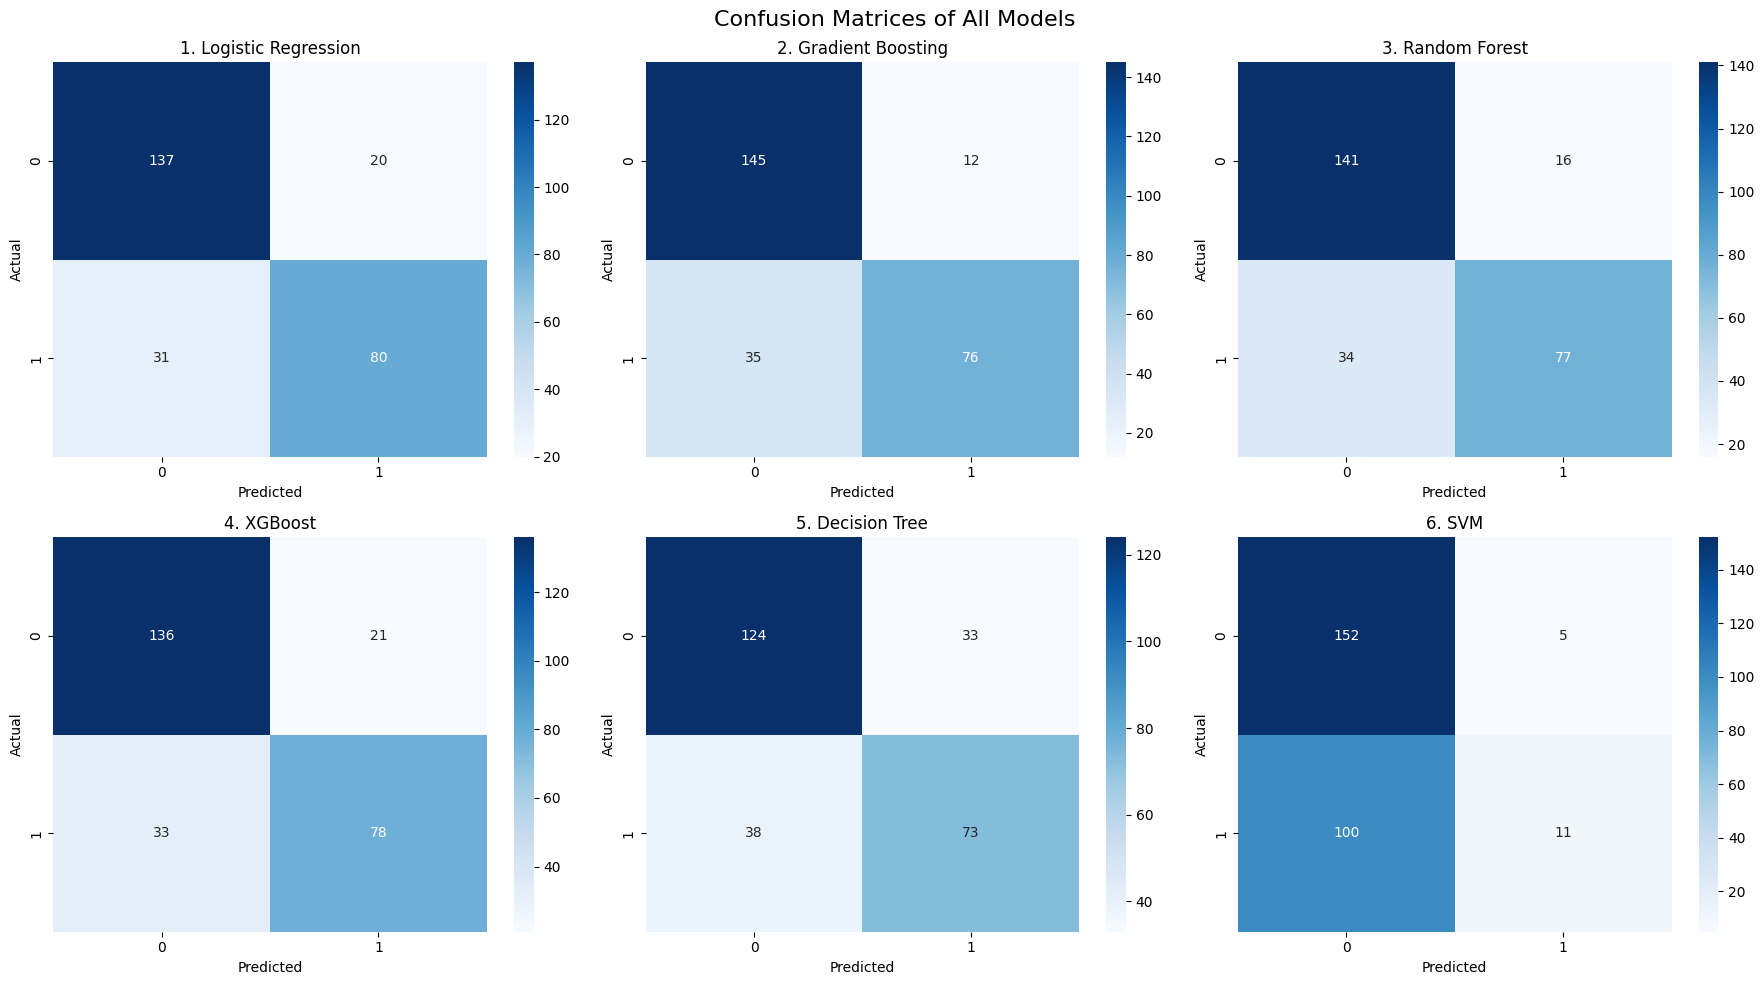

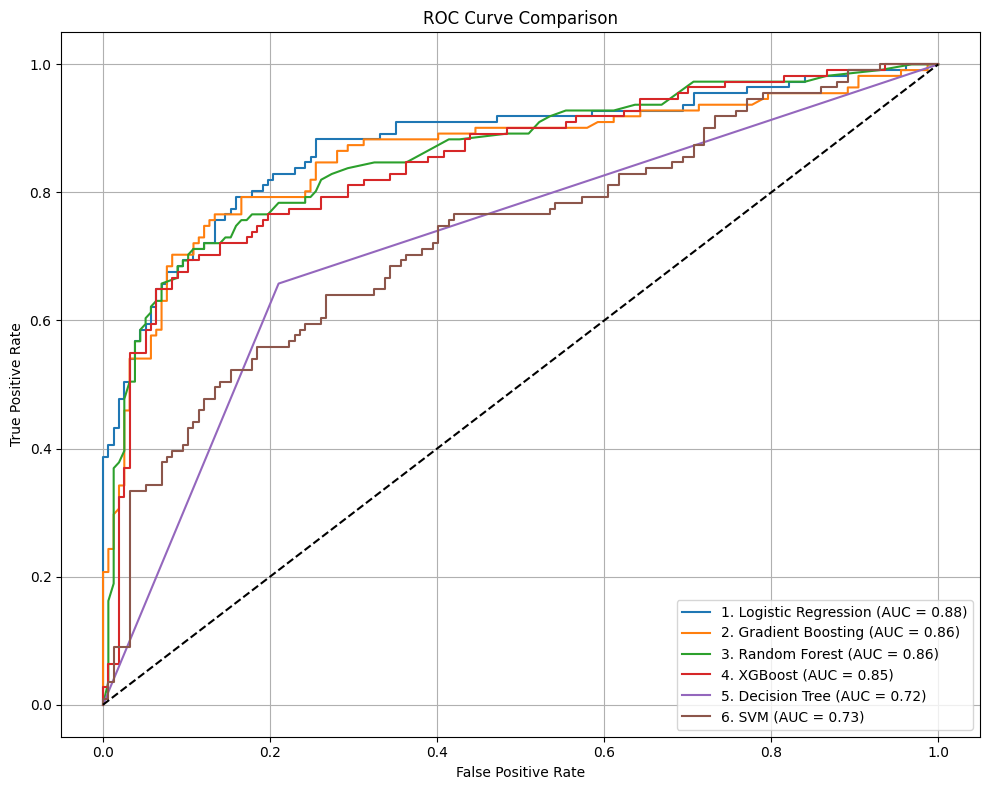

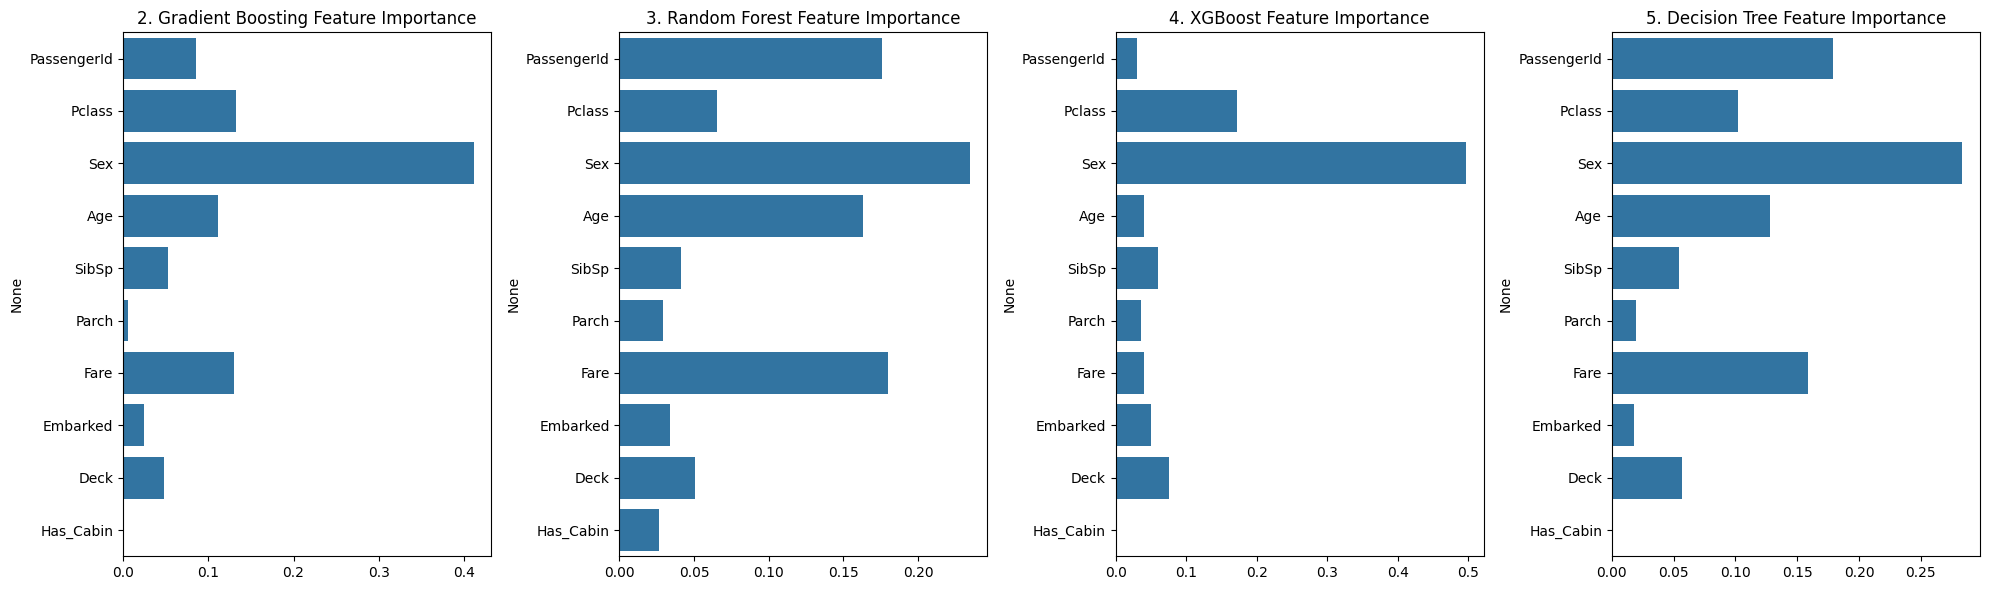

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pandas as pd

# 1. 데이터 로드 및 전처리
Titanic_df = pd.read_csv("/content/drive/MyDrive/11. 데이터분석/data/titanic_decked_data.csv")
Titanic_df['Deck'] = Titanic_df['Deck'].fillna('Unknown')
Titanic_df['Deck'] = Titanic_df['Deck'].astype('category').cat.codes
Titanic_df = Titanic_df.drop(columns=['Name', 'Ticket', 'Cabin'])

X = Titanic_df.drop(columns=['Survived'])
y = Titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. 모델 정의
models = {
    "1. Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "2. Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "3. Random Forest": RandomForestClassifier(random_state=42),
    "4. XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "5. Decision Tree": DecisionTreeClassifier(random_state=42),
    "6. SVM": SVC(probability=True, random_state=42)
}

# 3. 평가 결과 저장용 dict
conf_matrices = {}
roc_curves = {}
feature_importances = {}

# 4. 학습, 예측, 평가 루프
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # 혼동 행렬 저장
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    # ROC Curve 저장
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr, auc(fpr, tpr))

    # Feature importance 저장 (가능한 모델만)
    if hasattr(model, "feature_importances_"):
        feature_importances[name] = model.feature_importances_

# 5. 혼동 행렬 시각화
fig_cm, axes_cm = plt.subplots(2, 3, figsize=(18, 10))
for ax, (name, cm) in zip(axes_cm.ravel(), conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
fig_cm.suptitle("Confusion Matrices of All Models", fontsize=16)
plt.tight_layout()
plt.show()

# 6. ROC Curve 시각화
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, auc_val) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_val:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Feature Importance 시각화 (가능한 모델만)
if feature_importances:
    fig_fi, axes_fi = plt.subplots(1, len(feature_importances), figsize=(20, 6))
    if len(feature_importances) == 1:
        axes_fi = [axes_fi]
    for ax, (name, importances) in zip(axes_fi, feature_importances.items()):
        sns.barplot(x=importances, y=X.columns, ax=ax)
        ax.set_title(f"{name} Feature Importance")
    plt.tight_layout()
    plt.show()


In [23]:
# 1. 정규화 (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X는 피처 데이터프레임

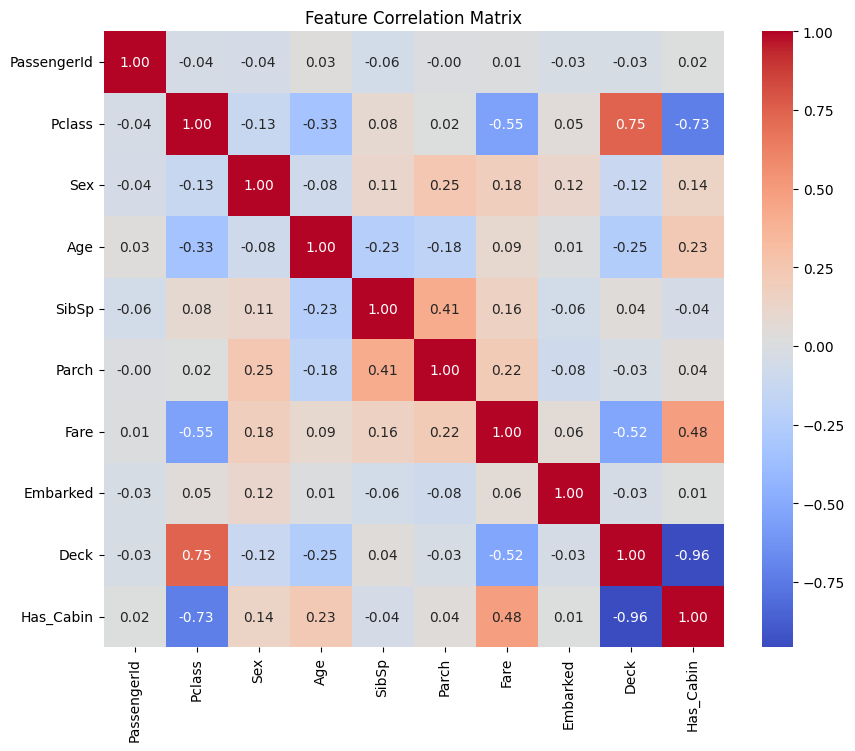

In [24]:
# 2. 상관관계 분석 (히트맵)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

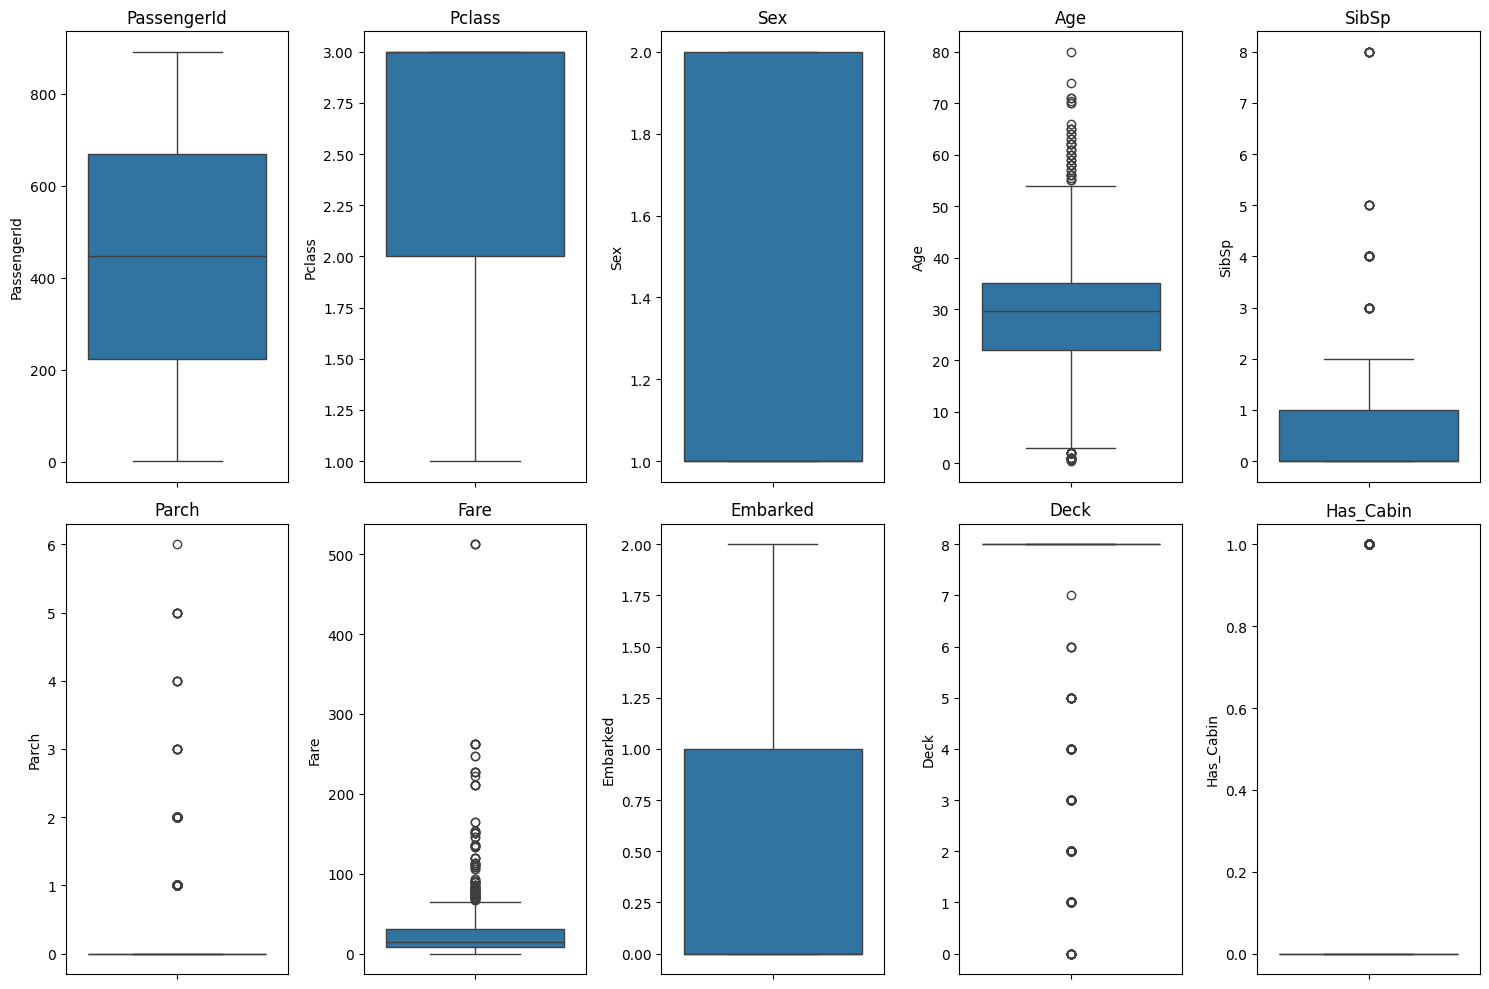

In [25]:
# 3. 이상치 탐지 (Boxplot)
numeric_cols = X.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(2, (len(numeric_cols) + 1) // 2, idx)
    sns.boxplot(y=X[col])
    plt.title(col)
plt.tight_layout()
plt.show()

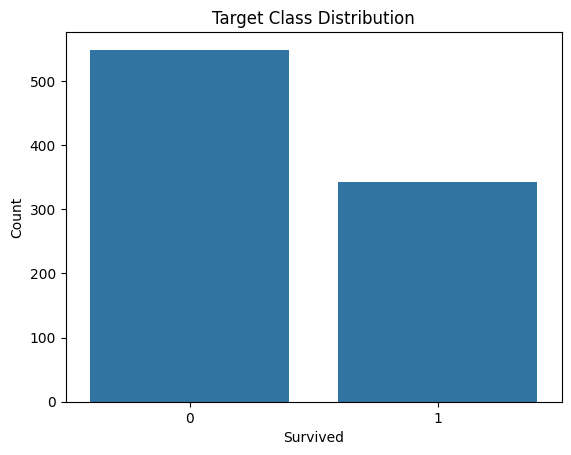

In [26]:
# 4. 클래스 불균형 확인
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

In [27]:
# 5. 로지스틱 회귀 계수 확인 (변수 영향력)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeff_df)

       Feature  Coefficient
2          Sex     1.285551
1       Pclass    -0.756658
3          Age    -0.518189
9    Has_Cabin     0.495565
4        SibSp    -0.356583
8         Deck     0.235434
7     Embarked     0.159439
6         Fare     0.087411
5        Parch    -0.081549
0  PassengerId     0.029397


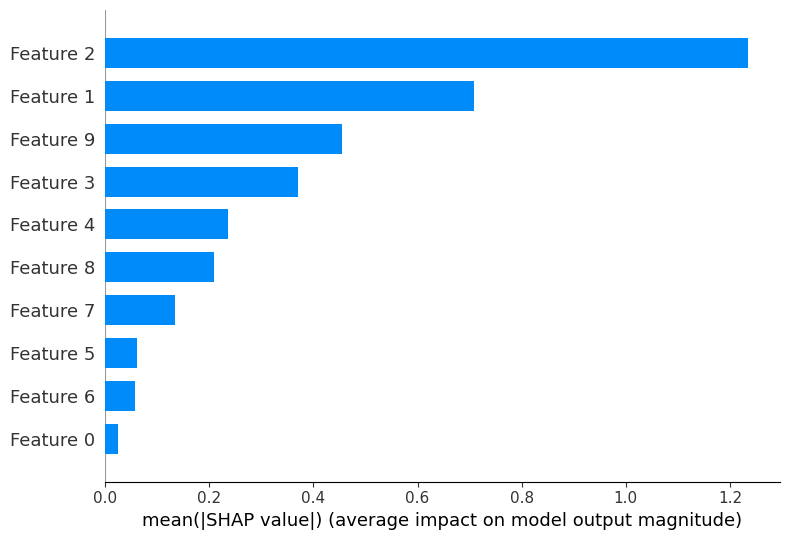

In [28]:
# 6. SHAP을 통한 설명력 분석 (해석 가능성 강화)
import shap

explainer = shap.Explainer(model, X_scaled)
shap_values = explainer(X_scaled)

shap.summary_plot(shap_values, X, plot_type="bar")

# **결론**

### 1. 정규화 (StandardScaler)
목적: 변수 스케일이 서로 달라서 특정 변수(예: Fare, Age)가 모델 학습에 과도하게 영향 주는 걸 방지함
결론: 정규화를 통해 모델 학습 속도 향상, 성능 일관성 확보

### 2. 상관관계 분석 (Correlation Heatmap)
목적: 변수 간 강한 상관이 있는 경우 중복 제거 또는 해석상 주의 필요
결론 예시:

Pclass와 Fare는 음의 상관이 있음 → 고급 클래스일수록 요금 높음

Sex_female과 Survived는 양의 상관 → 여성일수록 생존 확률이 높음

### 3. 이상치 탐지 (Boxplot)
목적: 극단적인 값이 학습을 방해하지 않는지 시각적으로 확인
결론 예시:

Fare에서 몇몇 이상치 존재 → 로그 변환 또는 클리핑 고려 가능

Age는 전반적으로 정규 분포 형태 → 유지 가능

### 4. 클래스 불균형 확인
결론:

Survived 클래스는 약간의 불균형 존재 (0이 더 많음)

하지만 심각한 불균형은 아님 → accuracy 외 recall, precision도 함께 확인해야 함

### 5. 변수 영향력 (Logistic 회귀 계수 분석)
결론 예시:

Sex_female 계수가 가장 큼 → 여성은 생존에 강한 양의 영향

Pclass는 음의 계수 → 낮은 클래스일수록 생존 확률 낮음

Deck도 생존 확률과 관계 있음 (특정 Deck이 더 안전했을 가능성)

### 6. SHAP 기반 해석 (설명 가능한 AI)
목적: 각 피처가 예측 결과에 얼마나 영향을 미쳤는지 시각적으로 확인
결론 예시:

Sex_female, Pclass, Fare, Deck이 예측 결정에 가장 큰 기여

로지스틱 회귀 계수와 유사한 흐름 → 신뢰성 높음

In [29]:
import pandas as pd

# 모델 요약 정보
model_summaries = [
    {
        "순위": 1,
        "모델": "Logistic Regression",
        "정확도": 0.8172,
        "특징": "빠르고 해석 쉬움, 선형 결정 경계"
    },
    {
        "순위": 2,
        "모델": "Gradient Boosting",
        "정확도": 0.8134,
        "특징": "성능 우수, 느릴 수 있음"
    },
    {
        "순위": 3,
        "모델": "Random Forest",
        "정확도": 0.7873,
        "특징": "앙상블 모델, 과적합에 강함"
    },
    {
        "순위": 4,
        "모델": "XGBoost",
        "정확도": 0.7724,
        "특징": "앙상블 기반, 성능 우수"
    },
    {
        "순위": 5,
        "모델": "Decision Tree",
        "정확도": 0.7351,
        "특징": "해석 쉬움, 과적합 위험 있음"
    },
    {
        "순위": 6,
        "모델": "SVM",
        "정확도": 0.5970,
        "특징": "고차원 분리에 유리, 느릴 수 있음"
    }
]

# DataFrame 생성
df_summary = pd.DataFrame(model_summaries)

# CSV 파일로 저장
df_summary.to_csv("model_comparison_summary.csv", index=False)

# 출력 확인
print(df_summary)

   순위                   모델     정확도                   특징
0   1  Logistic Regression  0.8172  빠르고 해석 쉬움, 선형 결정 경계
1   2    Gradient Boosting  0.8134       성능 우수, 느릴 수 있음
2   3        Random Forest  0.7873      앙상블 모델, 과적합에 강함
3   4              XGBoost  0.7724        앙상블 기반, 성능 우수
4   5        Decision Tree  0.7351     해석 쉬움, 과적합 위험 있음
5   6                  SVM  0.5970  고차원 분리에 유리, 느릴 수 있음
